In [24]:
import pandas as pd
import plotly.express as px

# Cargar datos
data = pd.read_csv('../data/Datos_tienda.csv')

# CONVERSIONES GLOBALES: Columna de fecha a formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%Y')

## 1. ¿Cuál es la tienda que mayor ingresos produce y la que menos?

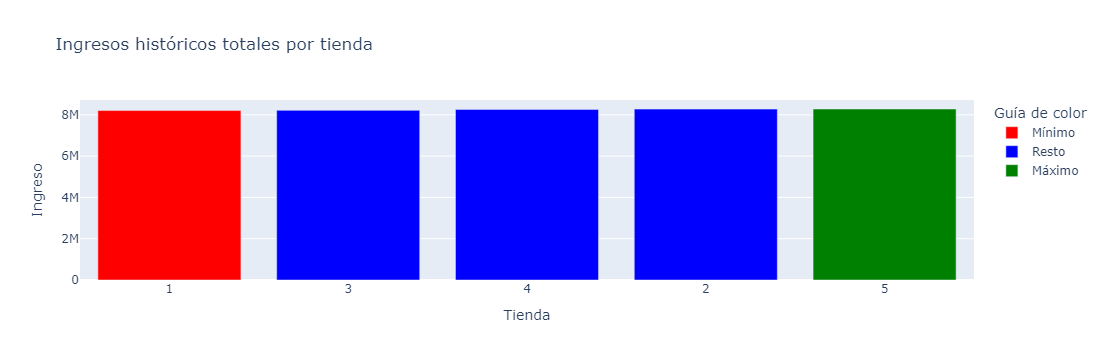

In [33]:
# FILTRAR: ingresos totales por tienda
ingresos = data.groupby('Tienda')['Ingreso'].sum().reset_index()

# ORDENAR: según la cantidad de ingresos por tienda
ingresos = ingresos.sort_values('Ingreso', ascending=True)

# CONVERSIONES: columna "Tienda" a String dado que es de tipo numérica, impidiendo una correcta ordenación en el gráfico
ingresos['Tienda'] = ingresos['Tienda'].astype(str)

# ------------------------------------------------------------------------------------------------------------
# OPCIONES DEL GRÁFICO:
# Identificar la tienda con el mayor y menor ingreso para después colorear
max_ingreso = ingresos.loc[ingresos['Ingreso'].idxmax()]
min_ingreso = ingresos.loc[ingresos['Ingreso'].idxmin()]

# Colorear las barras: la barra del máximo en verde y la del mínimo en rojo
ingresos['Guía de color'] = ingresos['Ingreso'].apply(
    lambda x: 'Máximo' if x == max_ingreso['Ingreso'] 
        else ('Mínimo' if x == min_ingreso['Ingreso'] 
        else 'Resto')
)

# Crear gráfico
fig = px.bar(
    ingresos,
    x='Tienda',
    y='Ingreso',
    title='Ingresos históricos totales por tienda',
    color='Guía de color', 
    color_discrete_map={'Máximo': 'green', 'Mínimo': 'red', 'Resto': 'blue'} 
)

# Mostrar gráfico
fig.show()

## 2. ¿En que año hubo mayores ventas en la tienda 3?

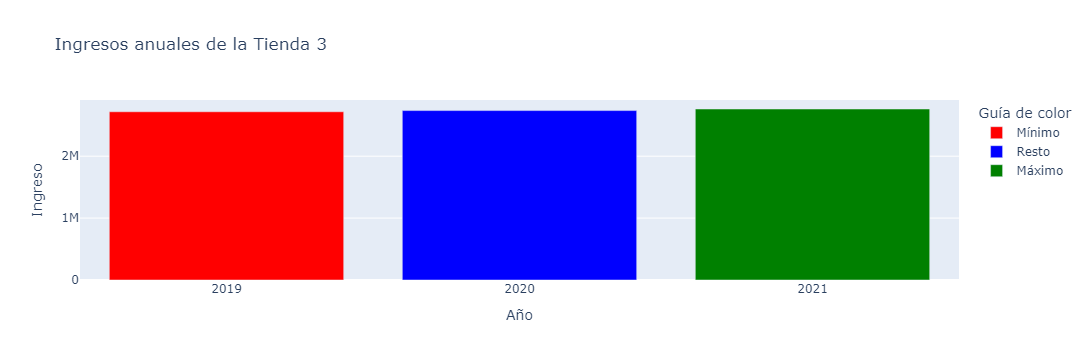

In [34]:
# FILTRAR: Tienda específica, por ejemplo, la Tienda 3. Hacemos una copia de los datos
data_tienda = data[data['Tienda'] == 3].copy()  

# Agregar una columna de año (convertida a string para mejorar el eje en el gráfico)
data_tienda['Año'] = data_tienda['Fecha'].dt.year.astype(str)

# Calcular ingresos totales por año
ingresos_por_año = data_tienda.groupby('Año')['Ingreso'].sum().reset_index()


# ------------------------------------------------------------------------------------------------------------
# OPCIONES DEL GRÁFICO:
# Identificar el máximo y el mínimo ingreso
max_ingreso = ingresos_por_año.loc[ingresos_por_año['Ingreso'].idxmax()]
min_ingreso = ingresos_por_año.loc[ingresos_por_año['Ingreso'].idxmin()]

# Añadir columna para guiar los colores de las barras
ingresos_por_año['Guía de color'] = ingresos_por_año['Ingreso'].apply(
    lambda x: 'Máximo' if x == max_ingreso['Ingreso'] 
        else ('Mínimo' if x == min_ingreso['Ingreso'] 
        else 'Resto')
)

# Crear gráfico
fig = px.bar(
    ingresos_por_año,
    x='Año',
    y='Ingreso',
    title=f'Ingresos anuales de la Tienda 3',
    color='Guía de color',  # Colorear según la guía
    color_discrete_map={'Máximo': 'green', 'Mínimo': 'red', 'Resto': 'blue'}
)

# Mostrar gráfico
fig.show()


## 3. ¿Cuales fueron los ingresos totales el año 2020 entre todas las tiendas?

In [27]:
# Sumamos los ingresos de 2020 de todas las tiendas 
ingresos_totales_2020 = data[data['Fecha'].dt.year == 2020]['Ingreso'].sum()

# Mostrar solución por pantalla
print("En 2020, los ingresos totales de las cinco tiendas fueron: " + str(ingresos_totales_2020))

Los ingresos totales de las 5 tiendas en 2020 son: 13759666


## 4. ¿Cuál es históricamente el mejor mes?

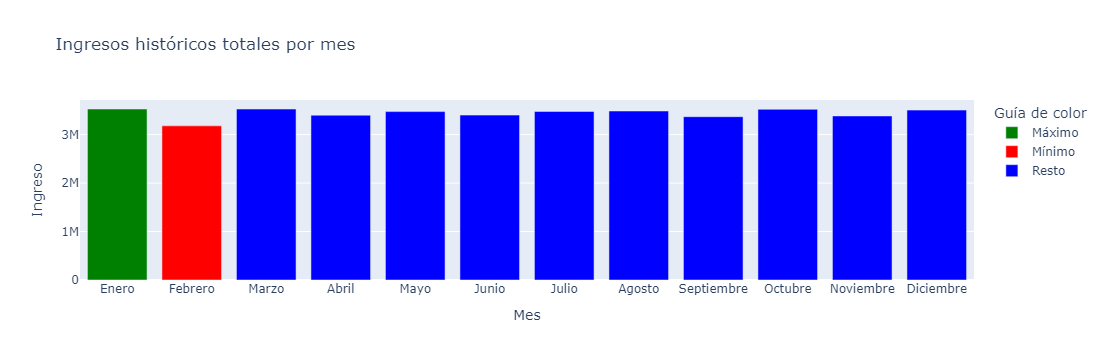

In [31]:
# Hacemos una copia de los datos
mejor_mes = data.copy()
mejor_mes['Mes'] = data['Fecha'].dt.month

# Sumamos los ingresos agrupados por mes
mejor_mes = mejor_mes.groupby('Mes')['Ingreso'].sum().reset_index()


# ------------------------------------------------------------------------------------------------------------
# OPCIONES DEL GRÁFICO:
# Mapeamos los números de los meses a nombres en español
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
mejor_mes['Mes'] = mejor_mes['Mes'].map(meses)

# Ordenamos los meses en orden cronológico
mejor_mes['Mes'] = pd.Categorical(
    mejor_mes['Mes'],
    categories=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    ordered=True
)

# Identificar los meses con mayor y menor ingreso
max_mes = mejor_mes.loc[mejor_mes['Ingreso'].idxmax()]
min_mes = mejor_mes.loc[mejor_mes['Ingreso'].idxmin()]

# Agregar una columna de guía de color
mejor_mes['Guía de color'] = mejor_mes['Ingreso'].apply(
    lambda x: 'Máximo' if x == max_mes['Ingreso']
    else 'Mínimo' if x == min_mes['Ingreso']
    else 'Resto'
)

# Crear gráfico
fig = px.bar(
    mejor_mes,
    x='Mes',
    y='Ingreso',
    title='Ingresos históricos totales por mes',
    color='Guía de color',
    color_discrete_map={'Máximo': 'green', 'Mínimo': 'red', 'Resto': 'blue'}
)

# Mostrar gráfico
fig.show()


## 5. ¿Cuántos productos se vendieron entre 2019 y 2020?

In [62]:
# Sumamos los productos vendidos entre los dos años
productos_vendidos = data[data['Fecha'].dt.year.isin([2019, 2020])]['Productos'].sum()

# Mostrar solución por pantalla
print("El total de productos vendidos por las cinco tiendas durante 2019 y 2020 es: " + str(productos_vendidos))

El número de productos totales vendidos entre las 5 tiendas durante 2019 y 2020 son: 118980
